# Question1

In [207]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt

In [208]:
polydata = loadmat("polydata.mat")

In [221]:
# retrieve the a matrix from data set
a_matrix = polydata["a"]
b_matrix = polydata["b"]
b_matrix

array([[ 0.0046453],
       [ 0.11852  ],
       [-0.030066 ],
       [ 0.1064   ],
       [-0.059625 ],
       [-0.060099 ],
       [-0.07444  ],
       [-0.050205 ],
       [ 0.15365  ],
       [ 0.16052  ],
       [-0.06001  ],
       [ 0.16538  ],
       [ 0.15596  ],
       [-0.07991  ],
       [ 0.008729 ],
       [-0.045867 ],
       [-0.048543 ],
       [ 0.064067 ],
       [ 0.055518 ],
       [ 0.16057  ],
       [-0.035738 ],
       [-0.043974 ],
       [ 0.03958  ],
       [ 0.12162  ],
       [-0.038826 ],
       [-0.04319  ],
       [-0.0083111],
       [-0.11175  ],
       [-0.054506 ],
       [-0.035801 ]])

In [210]:
# Degree of the Vandermonde matrix to be determined by user
def vander_degree(matrix, degree):
    '''
    Generating the Vandermonde matrix for the given scalar 'matrix'
    
    '''
    vander_matrix = np.vander(matrix.flatten(), degree + 1, increasing=True)

    return vander_matrix

In [211]:
def least_squares(A, d):
    """
    Solve the least squares problem for Ax = d.
    """
    # Compute A^T * A
    AtA = A.T @ A
    
    # Compute the inverse of A^T * A
    AtA_inv = np.linalg.inv(AtA)
    
    # Compute A^T * d
    Atd = A.T @ d
    
    # Compute the solution vector x
    x = AtA_inv @ Atd
    
    return x


In [212]:
#when p = 1
vander_1 = vander_degree(a_matrix, 1)
c1 = least_squares(vander_1, b_matrix)


In [213]:
#when p = 2
vander_2 = vander_degree(a_matrix, 2)
c2 = least_squares(vander_2, b_matrix)

In [214]:
#when p = 3
vander_3 = vander_degree(a_matrix, 3)
c3 = least_squares(vander_3, b_matrix)

In [219]:
y_fit1 = vander_1 @ c1
y_fit1

array([[ 0.05537462],
       [ 0.07488242],
       [-0.09194166],
       [ 0.07650824],
       [ 0.01631191],
       [-0.09825004],
       [-0.05948722],
       [-0.00199846],
       [ 0.08596118],
       [ 0.08754202],
       [-0.08538265],
       [ 0.088763  ],
       [ 0.08588835],
       [-0.01517217],
       [ 0.05228148],
       [-0.08874998],
       [-0.02879999],
       [ 0.07701377],
       [ 0.05055283],
       [ 0.08638531],
       [ 0.02132006],
       [-0.111494  ],
       [ 0.06274547],
       [ 0.08092304],
       [ 0.02624681],
       [ 0.04316913],
       [ 0.04003958],
       [-0.03512551],
       [ 0.02126437],
       [-0.08247373]])

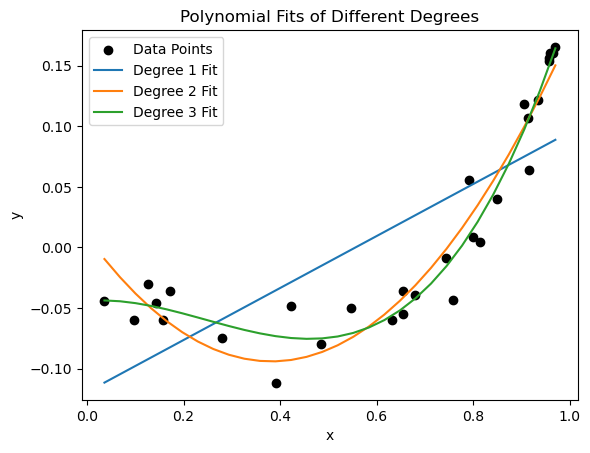

In [223]:
# Plot the original points
plt.scatter(a_matrix, b_matrix, color='black', label='Data Points')


a_range = np.linspace(a_matrix.min(), a_matrix.max(), 30)
V1_plot = vander_degree(a_range, 1)
V2_plot = vander_degree(a_range, 2)
V3_plot = vander_degree(a_range, 3)

# Calculate the polynomial values
y_fit1 = V1_plot @ c1
y_fit2 = V2_plot @ c2
y_fit3 = V3_plot @ c3



# Plot the polynomial fits
plt.plot(a_range, y_fit1, label='Degree 1 Fit')
plt.plot(a_range, y_fit2, label='Degree 2 Fit')
plt.plot(a_range, y_fit3, label='Degree 3 Fit')



plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Fits of Different Degrees')
plt.legend()
plt.show()

# Question 3

In [ ]:
def gram_schmidt(B):
    """Orthogonalize a set of vectors stored as the columns of matrix B."""
    # Get the number of vectors.
    m, n = B.shape
    # Create new matrix to hold the orthonormal basis
    U = np.zeros([m,n]) 
    for j in range(n):
        # To orthogonalize the vector in column j with respect to the
        # previous vectors, subtract from it its projection onto
        # each of the previous vectors.
        v = B[:,j].copy()
        for k in range(j):
            v -= np.dot(U[:, k], B[:, j]) * U[:, k]
        if np.linalg.norm(v)>1e-10:
            U[:, j] = v / np.linalg.norm(v)
    return U

if __name__ == '__main__':
    B1 = np.array([[1.0, 1.0, 0.0], [2.0, 2.0, 0.0], [2.0, 2.0, 1.0]])
    A1 = gram_schmidt(B1)
    print(A1)
    A2 = gram_schmidt(np.random.rand(4,2)@np.random.rand(2,5))
    print(A2.transpose()@A2)

[[ 0.33333333  0.         -0.2981424 ]
 [ 0.66666667  0.         -0.59628479]
 [ 0.66666667  0.          0.74535599]]
[[1.00000000e+00 5.55111512e-16 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [5.55111512e-16 1.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]]


In [ ]:
movie = loadmat("movie.mat")
movie

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Mon Aug 27 12:46:41 2018',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[ 4,  7,  2,  8,  7,  4,  2],
        [ 9,  3,  5,  6, 10,  5,  5],
        [ 4,  8,  3,  7,  6,  4,  1],
        [ 9,  2,  6,  5,  9,  5,  4],
        [ 4,  9,  2,  8,  7,  4,  1]], dtype=uint8)}

In [ ]:
X = movie["X"]
X

array([[ 4,  7,  2,  8,  7,  4,  2],
       [ 9,  3,  5,  6, 10,  5,  5],
       [ 4,  8,  3,  7,  6,  4,  1],
       [ 9,  2,  6,  5,  9,  5,  4],
       [ 4,  9,  2,  8,  7,  4,  1]], dtype=uint8)

In [ ]:
#convert the X matrix to float type
X = X.astype('float64')
X

array([[ 4.,  7.,  2.,  8.,  7.,  4.,  2.],
       [ 9.,  3.,  5.,  6., 10.,  5.,  5.],
       [ 4.,  8.,  3.,  7.,  6.,  4.,  1.],
       [ 9.,  2.,  6.,  5.,  9.,  5.,  4.],
       [ 4.,  9.,  2.,  8.,  7.,  4.,  1.]])

In [ ]:
unity_vector = np.ones((5, 1))

# Concatenating the unity vector to the left of the original X matrix
X1 = np.hstack((unity_vector, X))

X1


array([[ 1.,  4.,  7.,  2.,  8.,  7.,  4.,  2.],
       [ 1.,  9.,  3.,  5.,  6., 10.,  5.,  5.],
       [ 1.,  4.,  8.,  3.,  7.,  6.,  4.,  1.],
       [ 1.,  9.,  2.,  6.,  5.,  9.,  5.,  4.],
       [ 1.,  4.,  9.,  2.,  8.,  7.,  4.,  1.]])

In [ ]:
T = gram_schmidt(X1)
T

array([[ 4.47213595e-01, -3.65148372e-01, -6.32455532e-01,
        -5.16397779e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -4.55191440e-15],
       [ 4.47213595e-01,  5.47722558e-01,  3.16227766e-01,
        -3.87298335e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  5.00000000e-01],
       [ 4.47213595e-01, -3.65148372e-01,  1.96606674e-15,
         6.45497224e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  5.00000000e-01],
       [ 4.47213595e-01,  5.47722558e-01, -3.16227766e-01,
         3.87298335e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -5.00000000e-01],
       [ 4.47213595e-01, -3.65148372e-01,  6.32455532e-01,
        -1.29099445e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -5.00000000e-01]])

the first basis vector is equal to t1

## b

In [ ]:
w1 = np.array([[30, 29, 18, 34, 39, 22, 13]])* (5**(-0.5))
t1 = np.array([[1], [1], [1], [1], [1]]) * (5**(-0.5))
x1 = t1 @ w1
x1



array([[6. , 5.8, 3.6, 6.8, 7.8, 4.4, 2.6],
       [6. , 5.8, 3.6, 6.8, 7.8, 4.4, 2.6],
       [6. , 5.8, 3.6, 6.8, 7.8, 4.4, 2.6],
       [6. , 5.8, 3.6, 6.8, 7.8, 4.4, 2.6],
       [6. , 5.8, 3.6, 6.8, 7.8, 4.4, 2.6]])

In [ ]:
X

array([[ 4.,  7.,  2.,  8.,  7.,  4.,  2.],
       [ 9.,  3.,  5.,  6., 10.,  5.,  5.],
       [ 4.,  8.,  3.,  7.,  6.,  4.,  1.],
       [ 9.,  2.,  6.,  5.,  9.,  5.,  4.],
       [ 4.,  9.,  2.,  8.,  7.,  4.,  1.]])

The Residual matrix 1:

In [ ]:
R1 = X - x1
print(R1)

[[-2.   1.2 -1.6  1.2 -0.8 -0.4 -0.6]
 [ 3.  -2.8  1.4 -0.8  2.2  0.6  2.4]
 [-2.   2.2 -0.6  0.2 -1.8 -0.4 -1.6]
 [ 3.  -3.8  2.4 -1.8  1.2  0.6  1.4]
 [-2.   3.2 -1.6  1.2 -0.8 -0.4 -1.6]]


## c

According to the question(a), the second basis vector of A2 should be t2

In [ ]:
t1 = T[:, 0] 
t2 = T[:, 1]

In [ ]:
T2 = np.column_stack((t1, t2))
T2

array([[ 0.4472136 , -0.36514837],
       [ 0.4472136 ,  0.54772256],
       [ 0.4472136 , -0.36514837],
       [ 0.4472136 ,  0.54772256],
       [ 0.4472136 , -0.36514837]])

here use the least squred methods to get $ W = (T^T T)^{-1} T^T X $, but since T is an orthonogal matrix, it can be written as $ W = T^T X $

In [ ]:
W2 = T2.transpose()@X
W2

array([[13.41640786, 12.96919427,  8.04984472, 15.20526225, 17.44133022,
         9.8386991 ,  5.81377674],
       [ 5.47722558, -6.02494813,  3.46890953, -2.37346442,  3.10376116,
         1.09544512,  3.46890953]])

In [ ]:
X_approximate2 = T2@W2
X_approximate2

array([[4.        , 8.        , 2.33333333, 7.66666667, 6.66666667,
        4.        , 1.33333333],
       [9.        , 2.5       , 5.5       , 5.5       , 9.5       ,
        5.        , 4.5       ],
       [4.        , 8.        , 2.33333333, 7.66666667, 6.66666667,
        4.        , 1.33333333],
       [9.        , 2.5       , 5.5       , 5.5       , 9.5       ,
        5.        , 4.5       ],
       [4.        , 8.        , 2.33333333, 7.66666667, 6.66666667,
        4.        , 1.33333333]])

In [ ]:
R2 = X - X_approximate2
R2

array([[ 1.77635684e-15, -1.00000000e+00, -3.33333333e-01,
         3.33333333e-01,  3.33333333e-01,  1.77635684e-15,
         6.66666667e-01],
       [-3.55271368e-15,  5.00000000e-01, -5.00000000e-01,
         5.00000000e-01,  5.00000000e-01, -1.77635684e-15,
         5.00000000e-01],
       [ 1.77635684e-15,  2.66453526e-15,  6.66666667e-01,
        -6.66666667e-01, -6.66666667e-01,  1.77635684e-15,
        -3.33333333e-01],
       [-3.55271368e-15, -5.00000000e-01,  5.00000000e-01,
        -5.00000000e-01, -5.00000000e-01, -1.77635684e-15,
        -5.00000000e-01],
       [ 1.77635684e-15,  1.00000000e+00, -3.33333333e-01,
         3.33333333e-01,  3.33333333e-01,  1.77635684e-15,
        -3.33333333e-01]])

## c

In [ ]:
t3 = T[:,2]
t3

array([-6.32455532e-01,  3.16227766e-01,  1.96606674e-15, -3.16227766e-01,
        6.32455532e-01])

In [ ]:
T3 = np.column_stack((t1, t2, t3))
T3

array([[ 4.47213595e-01, -3.65148372e-01, -6.32455532e-01],
       [ 4.47213595e-01,  5.47722558e-01,  3.16227766e-01],
       [ 4.47213595e-01, -3.65148372e-01,  1.96606674e-15],
       [ 4.47213595e-01,  5.47722558e-01, -3.16227766e-01],
       [ 4.47213595e-01, -3.65148372e-01,  6.32455532e-01]])

In [ ]:
W3 = T3.transpose()@X
W3

array([[ 1.34164079e+01,  1.29691943e+01,  8.04984472e+00,
         1.52052622e+01,  1.74413302e+01,  9.83869910e+00,
         5.81377674e+00],
       [ 5.47722558e+00, -6.02494813e+00,  3.46890953e+00,
        -2.37346442e+00,  3.10376116e+00,  1.09544512e+00,
         3.46890953e+00],
       [ 7.99360578e-15,  1.58113883e+00, -3.16227766e-01,
         3.16227766e-01,  3.16227766e-01,  1.50990331e-14,
        -3.16227766e-01]])

In [ ]:
X_approximate3 = T3@W3
X_approximate3 

array([[4.        , 7.        , 2.53333333, 7.46666667, 6.46666667,
        4.        , 1.53333333],
       [9.        , 3.        , 5.4       , 5.6       , 9.6       ,
        5.        , 4.4       ],
       [4.        , 8.        , 2.33333333, 7.66666667, 6.66666667,
        4.        , 1.33333333],
       [9.        , 2.        , 5.6       , 5.4       , 9.4       ,
        5.        , 4.6       ],
       [4.        , 9.        , 2.13333333, 7.86666667, 6.86666667,
        4.        , 1.13333333]])

The residual for rank 3 should be

In [ ]:
R3 = X - X_approximate3
R3

array([[ 6.66133815e-15,  2.75335310e-14, -5.33333333e-01,
         5.33333333e-01,  5.33333333e-01,  1.15463195e-14,
         4.66666667e-01],
       [-5.32907052e-15, -1.37667655e-14, -4.00000000e-01,
         4.00000000e-01,  4.00000000e-01, -6.21724894e-15,
         6.00000000e-01],
       [ 1.77635684e-15,  0.00000000e+00,  6.66666667e-01,
        -6.66666667e-01, -6.66666667e-01,  1.77635684e-15,
        -3.33333333e-01],
       [-1.77635684e-15,  1.31006317e-14,  4.00000000e-01,
        -4.00000000e-01, -4.00000000e-01,  2.66453526e-15,
        -6.00000000e-01],
       [-3.55271368e-15, -2.66453526e-14, -1.33333333e-01,
         1.33333333e-01,  1.33333333e-01, -7.99360578e-15,
        -1.33333333e-01]])